## 1143. 最长公共子序列
给定两个字符串 text1 和 text2，返回这两个字符串的最长 公共子序列 的长度。如果不存在 公共子序列 ，返回 0 

一个字符串的 子序列 是指这样一个新的字符串：它是由原字符串在不改变字符的相对顺序的情况下删除某些字符（也可以不删除任何字符）后组成的新字符串。

例如，"ace" 是 "abcde" 的子序列，但 "aec" 不是 "abcde" 的子序列。
两个字符串的 公共子序列 是这两个字符串所共同拥有的子序列。

示例 1：
```
输入：text1 = "abcde", text2 = "ace" 
输出：3  
解释：最长公共子序列是 "ace" ，它的长度为 3 。
```
示例 2：
```
输入：text1 = "abc", text2 = "abc"
输出：3
解释：最长公共子序列是 "abc" ，它的长度为 3 。
```
示例 3：
```
输入：text1 = "abc", text2 = "def"
输出：0
解释：两个字符串没有公共子序列，返回 0 。
```

动态规划套路：

单个数组或者字符串要用动态规划时，可以把动态规划 dp[i] 定义为 nums[0:i] 中想要求的结果；

当两个数组或者字符串要用动态规划时，可以把动态规划定义成两维的 dp[i][j] ，其含义是在 A[0:i] 与 B[0:j] 之间匹配得到的想要的结果。



### 1. 状态定义
比如对于本题而言，可以定义 dp[i][j] 表示 text1[0:i-1] 和 text2[0:j-1] 的最长公共子序列的长度。

（注：text1[0:i-1] 表示的是 text1 的 第 0 个元素到第 i - 1 个元素，两端都包含）

之所以 dp[i][j] 的定义不是 text1[0:i] 和 text2[0:j] ，是为了方便当 i = 0 或者 j = 0 的时候，dp[i][j]表示的为空字符串和另外一个字符串的匹配，这样 dp[i][j] 可以初始化为 0.

### 2. 状态转移方程
知道状态定义之后，我们开始写状态转移方程。

当 $text1[i - 1] == text2[j - 1]$ 时，说明两个子字符串的最后一位相等，所以最长公共子序列又增加了 1

所以 $dp[i][j] = dp[i - 1][j - 1] + 1$；

举个例子，比如对于 ac 和 bc 而言，他们的最长公共子序列的长度等于 a 和 c 的最长公共子序列长度 0 + 1 = 1。


当 $text1[i - 1] != text2[j - 1]$ 时，说明两个子字符串的最后一位不相等，那么此时的状态 $dp[i][j]$ 应该是 $dp[i - 1][j]$ 和 $dp[i][j - 1]$ 的最大值。

举个例子，比如对于 ace 和 bc 而言，他们的最长公共子序列的长度等于 ① ace 和 b 的最长公共子序列长度0 与 ② ac 和 bc 的最长公共子序列长度1 的最大值，即 1。

综上状态转移方程为：

$dp[i][j] = dp[i - 1][j - 1] + 1$, 当 text1[i - 1] == text2[j - 1];

$dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])$, 当 text1[i - 1] != text2[j - 1]



### 3. 状态的初始化
初始化就是要看当 $i = 0$ 与 $j = 0$ 时， $dp[i][j]$ 应该取值为多少。

当 $i = 0$ 时，$dp[0][j]$ 表示的是 $text1$ 中取空字符串 跟 $text2$ 的最长公共子序列，结果肯定为 0.

当 $j = 0$ 时，$dp[i][0]$ 表示的是 $text2$ 中取空字符串 跟 $text1$ 的最长公共子序列，结果肯定为 0.

综上，当 $i = 0$ 或者 $j = 0$ 时，$dp[i][j]$ 初始化为 0.



### 4. 遍历方向与范围
由于 $dp[i][j]$ 依赖与 $dp[i - 1][j - 1]$ , $dp[i - 1][j]$, $dp[i][j - 1]$，所以 $i$ 和 $j$ 的遍历顺序肯定是从小到大的。

另外，由于当 $i$ 和 $j$ 取值为 0 的时候，$dp[i][j] = 0$，而 `dp` 数组本身初始化就是为 0，所以，直接让 $i$ 和 $j$ 从 1 开始遍历。遍历的结束应该是字符串的长度为 `len(text1)` 和 `len(text2)`

### 5. 最终返回结果
由于 `dp[i][j]` 的含义是 `text1[0:i-1]` 和 `text2[0:j-1]` 的最长公共子序列。

我们最终希望求的是 `text1` 和 `text2` 的最长公共子序列。所以需要返回的结果是 `i = len(text1)` 并且 `j = len(text2)` 时的 `dp[len(text1)][len(text2)`]。


In [6]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        M, N = len(text1), len(text2)
        dp = [[0]*(N+1) for _ in range(M+1)]
        for i in range(1, M+1):
            for j in range(1, N+1):
                if text1[i-1] == text2[j-1]:
                    dp[i][j] =dp[i-1][j-1] + 1i
                elif text1[i-1] != text2[j-1]:
                    dp[i][j] = max(dp[i-1][j], dp[i][j-1])
        return dp[M][N]
                

In [7]:
ss = Solution()
text1 = "abc"
text2 = "def"
res = ss.longestCommonSubsequence(text1, text2)
print(res)

0


## 781. 森林中的兔子
森林中，每个兔子都有颜色。其中一些兔子（可能是全部）告诉你还有多少其他的兔子和自己有相同的颜色。我们将这些回答放在 answers 数组里。

返回森林中兔子的最少数量

示例:
```
输入: answers = [1, 1, 2]
输出: 5

解释:
两只回答了 "1" 的兔子可能有相同的颜色，设为红色。
之后回答了 "2" 的兔子不会是红色，否则他们的回答会相互矛盾。
设回答了 "2" 的兔子为蓝色。
此外，森林中还应有另外 2 只蓝色兔子的回答没有包含在数组中。
因此森林中兔子的最少数量是 5: 3 只回答的和 2 只没有回答的。
```
```
输入: answers = [10, 10, 10]
输出: 11
```
```
输入: answers = []
输出: 0
```

In [17]:
from typing import List

import math
class Solution:
    def numRabbits(self, answers: List[int]) -> int:
        res = 0
        from collections import Counter
        rab_dict = Counter(answers)
        for (key, value) in rab_dict.items():
            if value <= key+1:
                res += key + 1
            elif value > key+1:
                if key != 0:
                    res += math.ceil(value/(key+1)) * (key+1)
                else:
                    res += value
                
        return res

In [ ]:
class Solution:
    def numRabbits(self, answers: List[int]) -> int:
        return sum([ceil(j/(i+1))*(i+1) for i, j in Counter(answers).items()])

In [20]:
ss = Solution()
answers = [1, 1, 2]
res = ss.numRabbits(answers)
print(res)

5


## 面试题 17.21. 直方图的水量
给定一个直方图(也称柱状图)，假设有人从上面源源不断地倒水，最后直方图能存多少水量?直方图的宽度为 1。
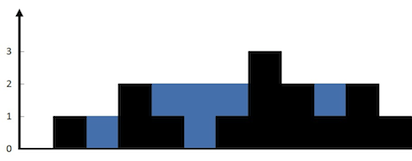
上面是由数组 [0,1,0,2,1,0,1,3,2,1,2,1] 表示的直方图，在这种情况下，可以接 6 个单位的水（蓝色部分表示水）

示例:
```
输入: [0,1,0,2,1,0,1,3,2,1,2,1]
输出: 6
```


#### 解法1：按列求

每一列的水，只需要关注当前列，以及左边最高的墙，右边最高的墙就够了，然后再看那一边更矮。

- 较矮的墙的高度大于当前列的墙的高度:
  较矮的一边，也就是左边的墙的高度，减去当前列的高度就可以了。如`2-1=1`, 此单位可以存1单位的水

- 矮的墙的高度小于当前列的墙的高度：正在求的列不会有水，因为它大于了两边较矮的墙。

<img src="LeetCode -- Python 学习之旅.assets/image-20200404150049608.png" alt="image-20200404150049608" style="zoom:67%;" />

- 较矮的墙的高度等于当前列的墙的高度：和上一种情况是一样的，不会有水

所以确定了最左、最右最高的墙，以及确定两边谁更高之后，只需要`当前列<更矮的一边`，就可以存水

In [52]:
class Solution:
    def trap(self, height: List[int]) -> int:
        ans = 0
        for i in range(1, len(height)-1):
            max_left, max_right = 0, 0
            for j in range(i-1, -1, -1):
                max_left = height[j] if max_left < height[j] else max_left
            for j in range(i+1, len(height)):
                max_right = height[j] if max_right < height[j] else max_right
            less = min(max_left, max_right)
            ans += less - height[i] if less > height[i] else 0
        return ans

In [53]:
ss = Solution()
test = [0,1,0,2,1,0,1,3,2,1,2,1]
res = ss.trap(test)
print(res)

6


In [59]:
from typing import List
class Solution2:
    def trap(self, height: List[int]) -> int:
        ans = 0
        max_left, max_right = [0]*len(height), [0]*len(height)
        for i in range(1, len(height)-1):
            max_left[i] = max(max_left[i-1], height[i-1])
        for i in range(len(height)-2, 0, -1):
            max_right[i] = max(max_right[i+1], height[i+1])
        for i in range(1, len(height)-1):
            less = min(max_left[i], max_right[i])
            ans += less - height[i] if less > height[i] else 0
        print(max_left, max_right)
        return ans

In [60]:
ss = Solution2()
test = [0,1,0,2,1,0,1,3,2,1,2,1]
res = ss.trap(test)
print(res)

[0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 0] [0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 0]
6
